In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [2]:
# import the libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# import the dataset
df = pd.read_csv("Iris.csv") 

In [115]:
# show first few lines 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# check for inconsistency in the dataset
# there are no null values, so the data can be processed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [117]:
# remove unnecessary column 
df.drop('Id', axis = 1, inplace = True)

# rename columns 
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

In [118]:
df.Species = df.Species.astype('category')

## Perform some explanatory data analysis with Iris

The graph shows the relationship between the sepal length and the sepal width.

In [24]:
sns.set_style('dark')

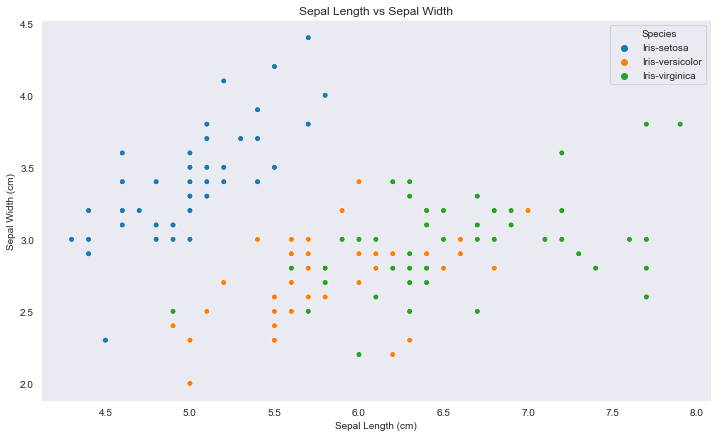

In [119]:
f, ax = plt.subplots(figsize = (12, 7))
ax  = sns.scatterplot(x = 'SepalLength', y = 'SepalWidth', data = df, hue = 'Species')
ax.set_title('Sepal Length vs Sepal Width')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
plt.show()

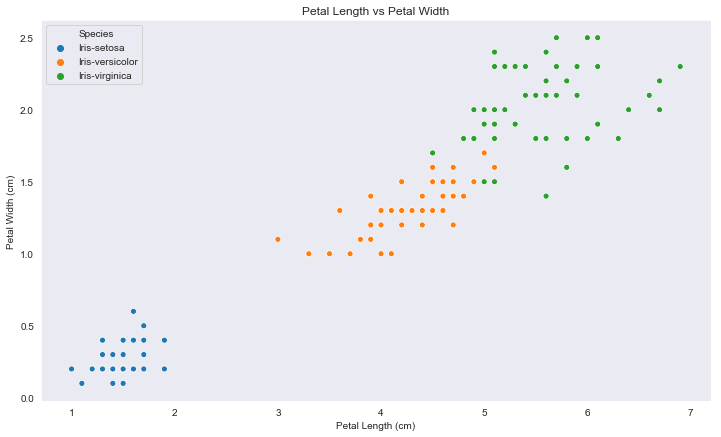

In [120]:
f, ax = plt.subplots(figsize = (12, 7))
ax  = sns.scatterplot(x = 'PetalLength', y = 'PetalWidth', data = df, hue = 'Species')
ax.set_title('Petal Length vs Petal Width')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
plt.show()

As we can see, the petal features obviously provide better cluster division than the sepal features and thus will help making predictions about the species of iris more accurately. 

Let's see how the lengths and widths are distributed.

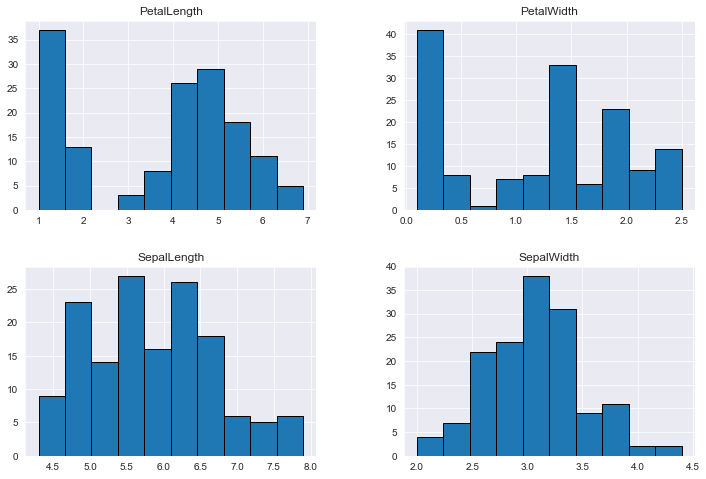

In [121]:
ax = df.hist(edgecolor = 'black')
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

Let's see how the lenght and width vary according to the species.

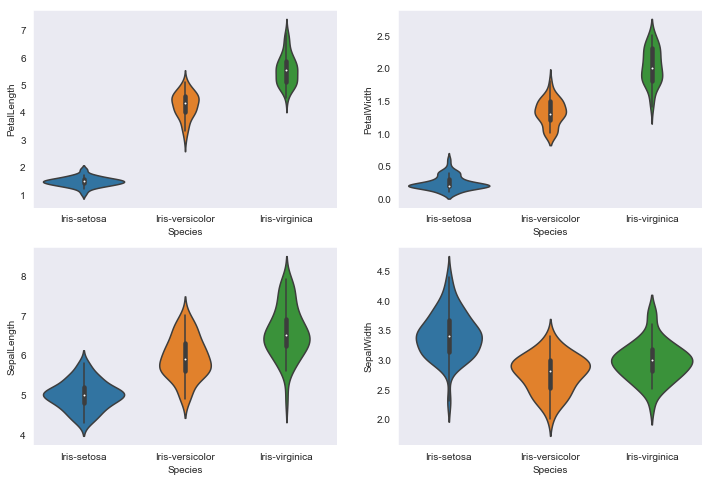

In [123]:
f, axes = plt.subplots(2, 2, figsize = (12, 8))
ax1 = sns.violinplot(x = 'Species', y = 'PetalLength', data = df, ax = axes[0, 0]) 
ax2 = sns.violinplot(x = 'Species', y = 'PetalWidth', data = df, ax = axes[0, 1]) 
ax3 = sns.violinplot(x = 'Species', y = 'SepalLength', data = df, ax = axes[1, 0]) 
ax4 = sns.violinplot(x = 'Species', y = 'SepalWidth', data = df, ax = axes[1, 1]) 

The violinplot shows the distribution and density of each features. The thinner part denotes that there is less density whereas the fatter part conveys higher density

## Species Classification

**Classification**: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data.

**Regression**: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some machine learning notations.

**Attribute**: A property of an instance that may be used to determine its classification. In this dataset, the attributes are the petal length and width, sepal length and width. It is also known as **Feature**.

**Target Variable**: In the machine learning context, it is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [107]:
# import all necessary packages for classification using machine learning algorithms 

from sklearn.linear_model import LogisticRegression # for Logistic Regression 
from sklearn.cross_validation import train_test_split # for splitting dataset into training and test sets
from sklearn.neighbors import KNeighborsClassifier # for k-nearest Neighbors
from sklearn import svm # for Support Vector Machine 
from sklearn import metrics # for checking model  
from sklearn.tree import DecisionTreeClassifier # for using Decision Tree Classification 

In [109]:
# get the shape of the dataset 
df.shape

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are few features and some of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus features selection should be done carefully. This dataset has few features, but still we will see the correlation.

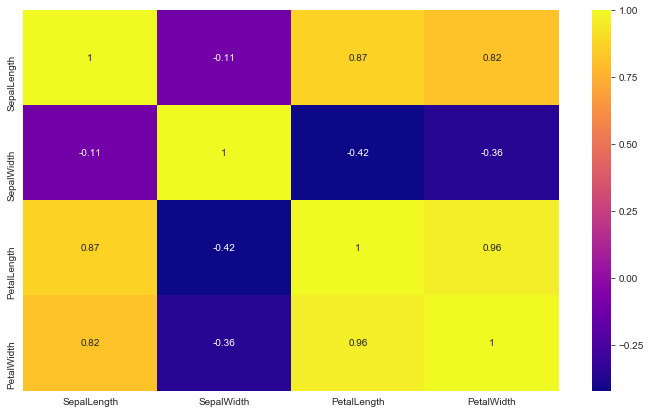

In [141]:
f, ax = plt.subplots(figsize = (12, 7))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.show()

### Observation 

The sepal width and length are not correlated The petal width and length are highly correlated.

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps before applying an algorithm 

1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3. Pass the training dataset to the algorithm to train it. We use the **.fit()** method.
4. Pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
5. Check the accuracy by comparing the predicted outcome and the actual output of the model.